### Check input files



In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


datasets/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
datasets/all_attacks.csv
datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv


### Import train data and create DataFrame object

In [2]:
def convert_dtype_to_int(x):
    if not x:
        return np.nan
    try:
        return int(x)
    except:
        return np.nan


def convert_dtype_to_float(x):
    if not x:
        return np.nan
    try:
        return float(x)
    except:
        return np.nan


In [3]:
def light_import(path):
    simple_cols = ['Flow Duration',
                   'Pkt Len Mean',
                   'Fwd Pkt Len Mean',
                   'Bwd Pkt Len Mean',
                   'Tot Fwd Pkts',
                   'Tot Bwd Pkts',
                   'TotLen Fwd Pkts',
                   'TotLen Bwd Pkts',
                   'Flow Byts/s',
                   'Label']

    result = pd.read_csv(path, usecols=simple_cols,
                         converters={'Flow Duration': convert_dtype_to_float,
                                     'Pkt Len Mean': convert_dtype_to_float,
                                     'Fwd Pkt Len Mean': convert_dtype_to_float,
                                     'Bwd Pkt Len Mean': convert_dtype_to_float,
                                     'Tot Fwd Pkts': convert_dtype_to_float,
                                     'Tot Bwd Pkts': convert_dtype_to_float,
                                     'TotLen Fwd Pkts': convert_dtype_to_float,
                                     'TotLen Bwd Pkts': convert_dtype_to_float,
                                     'Flow Byts/s': convert_dtype_to_float
                                     })
    return result


In [4]:
rawsData = light_import('datasets/all_attacks.csv')
print("The files have been imported")


The files have been imported


In [5]:
LABEL = 'Label'
NORMAL = 0
ATTACK = 1

In [6]:
def makeOnlyAttackOrNot(dataToTransform):
    dataToTransform[LABEL] = dataToTransform[LABEL].map(
        lambda i: 0 if i == 'Benign' else 1)
    return dataToTransform

In [7]:
makeOnlyAttackOrNot(rawsData)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Flow Byts/s,Pkt Len Mean,Label
0,112641719.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
1,112641466.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
2,112638623.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
3,6453966.0,15.0,10.0,1239.0,2273.0,82.600000,227.300000,544.161528,135.076923,0
4,8804066.0,14.0,11.0,1143.0,2209.0,81.642857,200.818182,380.733175,128.923077,0
...,...,...,...,...,...,...,...,...,...,...
8284248,3982183.0,14.0,8.0,1442.0,1731.0,103.000000,216.375000,796.799143,137.956522,0
8284249,3802316.0,14.0,8.0,1440.0,1731.0,102.857143,216.375000,833.965404,137.869565,0
8284250,4004239.0,14.0,8.0,1459.0,1731.0,104.214286,216.375000,796.655744,138.695652,0
8284251,3998435.0,14.0,8.0,1459.0,1731.0,104.214286,216.375000,797.812144,138.695652,0


In [8]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


def showAttackDistribution(data):
    counted = data.value_counts()

    fig = go.Figure(data=[
        go.Bar(name='NORMAL',
               y=[counted[NORMAL]],
               x=['NORMAL'],
               text=str(counted[NORMAL]),
               orientation='v',
               textposition='outside',),
        go.Bar(name='ATTACK',
               y=[counted[ATTACK]],
               x=['ATTACK'],
               text=str(counted[ATTACK]),
               orientation='v',
               textposition='outside',)
    ])
    # Change the bar mode
    fig.update_layout(
        width=800,
        height=600,
        title=f'Labels Distribution',
        yaxis_title='Number of attacks',
        xaxis_title='Attack Name',)
    iplot(fig)


In [9]:
showAttackDistribution(rawsData[LABEL])


In [10]:
selectedData = rawsData


In [11]:
withoutDuplicates = selectedData.drop_duplicates().copy()
withoutDuplicates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4437942 entries, 0 to 8284252
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Flow Duration     float64
 1   Tot Fwd Pkts      float64
 2   Tot Bwd Pkts      float64
 3   TotLen Fwd Pkts   float64
 4   TotLen Bwd Pkts   float64
 5   Fwd Pkt Len Mean  float64
 6   Bwd Pkt Len Mean  float64
 7   Flow Byts/s       float64
 8   Pkt Len Mean      float64
 9   Label             int64  
dtypes: float64(9), int64(1)
memory usage: 372.4 MB


In [12]:
showAttackDistribution(withoutDuplicates[LABEL])


In [13]:
def shortData(data, benignCount, attackCount):
    shortedNormal = data[data[LABEL] ==
                         NORMAL].sample(benignCount, ignore_index=True, random_state=32)
    shortedAttack = data[data[LABEL] == ATTACK].sample(
        attackCount, ignore_index=True, random_state=32)
    return pd.concat([shortedNormal, shortedAttack], axis=0)


In [14]:
toTrainModel = shortData(withoutDuplicates, 500000, 500000).copy()
showAttackDistribution(toTrainModel[LABEL])


In [15]:
def removeNanInf(data):
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data


In [16]:
toTrainModel = removeNanInf(toTrainModel)


In [17]:
def printNanFinite(data):
    print('Is any Nan:', np.any(np.isnan(data)))
    print('Is all finite:', np.all(np.isfinite(data)))


In [18]:
printNanFinite(toTrainModel)


Is any Nan: False
Is all finite: True


<AxesSubplot:>

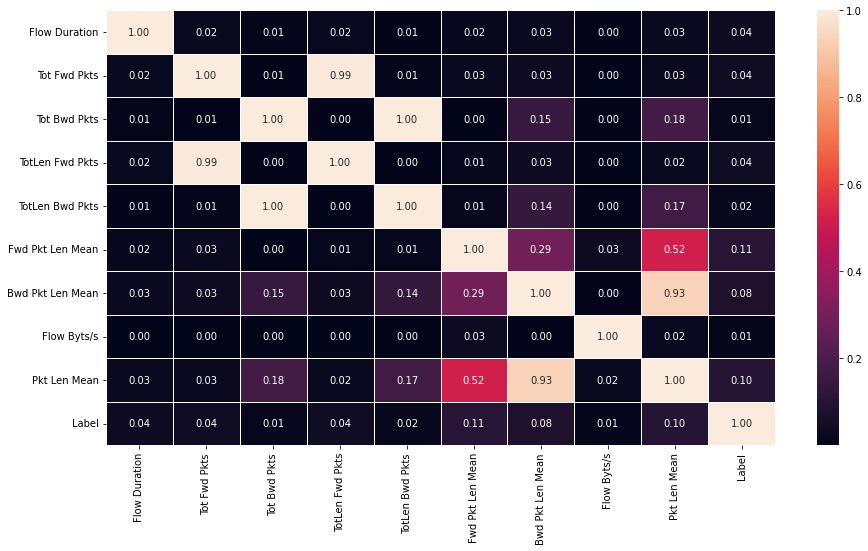

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(abs(toTrainModel.corr()), annot=True,
            linewidths=0.5, fmt='.2f', ax=ax)


In [20]:
labels = toTrainModel[LABEL]
toTrainModel = toTrainModel.drop([LABEL], axis=1)


In [21]:
labels.to_csv('output/to_train_labels.csv', index=False, header=None)

In [22]:
toTrainModel.to_csv('output/to_train_dataset.csv', index=False, header=None)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    toTrainModel, labels, test_size=0.33, random_state=32)


X_train.to_csv('output/X_train.csv', index=False, header=None)
X_test.to_csv('output/X_test.csv', index=False, header=None)
y_train.to_csv('output/y_train.csv', index=False, header=None)
y_test.to_csv('output/y_test.csv', index=False, header=None)


In [24]:
isRFC = True
isMLPC = False
isSequential = False


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense


def model():
    if isRFC:
        model = RandomForestClassifier(
            n_estimators=100, max_depth=5, min_samples_leaf=4)
    elif isMLPC:
        model = MLPClassifier(random_state=32)
    else:
        model = Sequential([
            Dense(256, activation='softplus', kernel_initializer='glorot_uniform',
                  input_dim=X_train.shape[1]),
            Dense(128, activation='softplus',
                  kernel_initializer='glorot_uniform'),
            Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam')

    return model


In [26]:
model = model()


In [27]:
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=4)

In [28]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def confMatrix(yTrain, xTrainPreds, yTest, xTestPreds):
    # Your code here
    cmTrain = confusion_matrix(yTrain, xTrainPreds)
    X_train_disp = ConfusionMatrixDisplay(confusion_matrix=cmTrain)

    cmTest = confusion_matrix(yTest, xTestPreds)
    X_test_disp = ConfusionMatrixDisplay(confusion_matrix=cmTest)
    # End

    _, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

    X_train_disp.plot(ax=ax[0])
    ax[0].set_title("Train")

    X_test_disp.plot(ax=ax[1])
    ax[1].set_title("Test")
    plt.show()


In [29]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def printScores(name, labels, predicts):
    print(name)
    print('Accuracy: %.3f ' % accuracy_score(labels, predicts))
    print('Precision: %.3f ' % precision_score(labels, predicts))
    print('Recall: %.3f' % recall_score(labels, predicts))
    print('F1 Score: %.3f' % f1_score(labels, predicts))
    print('\n')


In [30]:
X_train_preds = model.predict(X_train)
X_test_preds = model.predict(X_test)

if isSequential:
    print('Train auc:', roc_auc_score(y_train, X_train_preds))
    print('Test auc:', roc_auc_score(y_test, X_test_preds))
else:
    printScores('Train:', y_train, X_train_preds)
    printScores('Test:', y_test, X_test_preds)


Train:
Accuracy: 0.894 
Precision: 0.976 
Recall: 0.807
F1 Score: 0.884


Test:
Accuracy: 0.895 
Precision: 0.977 
Recall: 0.810
F1 Score: 0.886




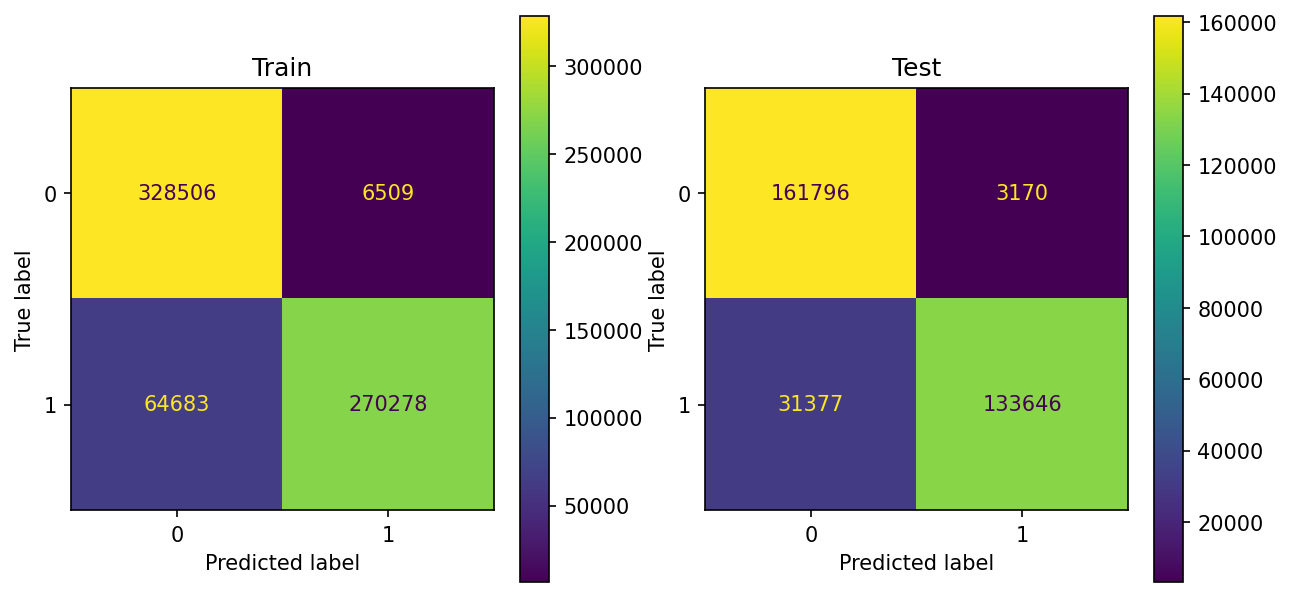

In [31]:
confMatrix(y_train, X_train_preds, y_test, X_test_preds)
